##Forside


SWMAL
Opgavesæt 3 [O3)

15 November 2024

Gruppenr: 1 

Jeppe Emil Smedegaard Pape (202008596)

Kristian Lund (20002248)

Niels Kristensen (201205937)

## cnn.ipynb

#### Introduction to CNNs

Convolutional Neural Networks (CNN) is an area within Machine Learning that specializes in pattern recognition. The neural network (NN) consist of multiple interconnected layers, each layer receiving an input, which is then transformed before being passed to the next layer [1]. Based on this a CNN contains a single input layer, several hidden layers and a single output layer. Here some of the hidden layers contains filters/kernels, which are used to perform convolutional opperations on the data passed on to the layer. For example passing in an image to a CNN, one convolutional layer with a filter could have a size of 3x3 containing 3X3 = 9 Kernel weights. From this, convolutional opperations are performed between the input data and filter (input_data*filter), resulting in a new data output (feature map), from the layer. 

Varying the Kernel weights of a filter, different patterns in the input image are scored in the output data differently. For example, one filter may give high scores whenever straight horizontal line appear in the input data, where another filter might give vertical lines a high score [2]. After passing the data through several filters, the output (numerical arrays) of all these are combined in a process called pooling, in which the dimensionality of the data is reduced.

Going deeper into the hidden layers of the CNN increases the abstraction of the pattern recognition. For example where the first layer might be able to reveal patterns such as straight lines, deeper layers might reveal more complex patterns such as a window or a door of a house [1].

[1] Martin Keen, IBM Cloud (https://www.youtube.com/watch?v=QzY57FaENXg)

[2] https://en.wikipedia.org/wiki/Convolutional_neural_network

#### Loading the MNIST dataset

Below the MNIST Dataset is imported. This is used to test the performance of our CNN later.

In [1]:
# Load MNIST Dataset
from keras.datasets import mnist
from keras.utils import to_categorical

2024-11-15 14:06:17.713857: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 14:06:17.717925: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 14:06:17.734581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731675977.753581  631754 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731675977.759051  631754 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-15 14:06:17.779252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Load and preprocess data
from sklearn.model_selection import train_test_split
(X, y), (_, _) = mnist.load_data()
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255
y = to_categorical(y, 10)

A quick look at the data to remember what we are facing; classification of handwritten numbers from 0 to 9.

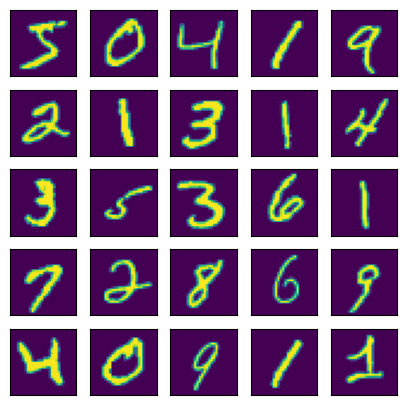

In [3]:
import matplotlib.pyplot as plt
#From https://www.tensorflow.org/tutorials/images/cnn
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
plt.show()

#### CNN model: Creating, training and predicting from a simple model

First the Keras open source library is imported. Keras is an API for Python deep learning models, such as CNNs.

In [4]:
import keras
from keras import layers

Next a Neural Network is created. Here the `keras.Sequential()` is used to sequentially stack layers, constituting our model. Layers are stacked using the `.add(layers)` method. Many types of layers exists in the Keras API [3]. 

The `layers.Conv2D()` adds a 2D (height and width) convolutional layer, which is perfect for fitting our model to predict 2D images. Important parameters of this method are the number of filters used (`filter`), the size of the filter window used in the convolutional opperations (`kernel_size`), the activation function used for calculating the output (`activation`) and the expected shape of the input data (`input_shape`).

The `layers.MaxPooling2D()` and `layers.AveragePooling2D()` downsamples the input respectively by setting the output as maximum or average value of input window. Here an important parameter of these methods are the downsampling factor in each dimension (`pool_size`).

To perform classification from the output of the convolutional layers, output of these are passed into a dense layer (`layers.Dense`) or series of dense layers. However, the dimensionality of the convolutional layers output does not match the required input to the dense layers (vector = 1D), so they have to be reshaped, which can be done with the `layers.flatten()` method.

In order to get an overview of the layers, their output shape and number of parameters in them the `summary()` can be used.

[3] https://keras.io/api/layers/

In [5]:
def make_simple_model():
    simple_model = keras.Sequential()
    simple_model.add(layers.Conv2D(filters = 6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #Input layer
    simple_model.add(layers.AveragePooling2D(pool_size=(2, 2))) #Downsampling layer
    simple_model.add(layers.Flatten()) #Flatten layer
    simple_model.add(layers.Dense(units = 10, activation='relu')) #Classification layer
    simple_model.add(layers.Dense(units = 10, activation='softmax')) #Output layer
    return simple_model

simple_model = make_simple_model()
simple_model.summary()

/home/lundse/2a - Softwaretek/SWMAL - Machine Learning/swmal-opgaver/my-venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1731675981.271566  631754 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1014)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        10,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,320 (40.31 KB)

 Trainable params: 10,320 (40.31 KB)

 Non-trainable params: 0 (0.00 B)

#### Generalization

Now we try to see how the simple model performs, when varying the test/train split ratio.

In [6]:
train_size = [5, 10, 100, 1000, 10000, 50000, 59000, 59500, 59990]

In [7]:
test_loss = []
test_acc = []
train_loss = []
train_acc = []

for i in train_size:
    print("Running with trainsize - testsize:", i, " - ", X.shape[0]-i)
    #Split data into training and testing sets
    X_train = X[:i]
    X_test = X[i:]
    y_train = y[:i]
    y_test = y[i:]
    #Create model
    simple_model = make_simple_model()
    #Compile
    simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #Train
    history = simple_model.fit(X_train, y_train, epochs=1, validation_split=0.2)

    #Save the loss and accuracy from the training and testing sets
    train_loss.append(history.history['val_loss'][-1]) #Save last loss from training set
    train_acc.append(history.history['val_accuracy'][-1]) #Save last accuracy from training set
    loss_from_test, acc_from_test = simple_model.evaluate(X_test, y_test)
    test_loss.append(loss_from_test)
    test_acc.append(acc_from_test)

Running with trainsize - testsize: 5  -  59995
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.3468 - val_accuracy: 0.0000e+00 - val_loss: 2.1309
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1257 - loss: 2.3019
Running with trainsize - testsize: 10  -  59990
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.3138 - val_accuracy: 0.0000e+00 - val_loss: 2.3939
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1160 - loss: 2.3095
Running with trainsize - testsize: 100  -  59900
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.0648 - loss: 2.3141 - val_accuracy: 0.1000 - val_loss: 2.3154
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1123 - loss: 2.3002
Running with trainsize - testsize: 1000  -  59000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1839 - loss: 2.2828 - val_accuracy: 0.3150 - val_loss: 2.2136
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3461 - loss: 2.2022
Running with trainsize - te

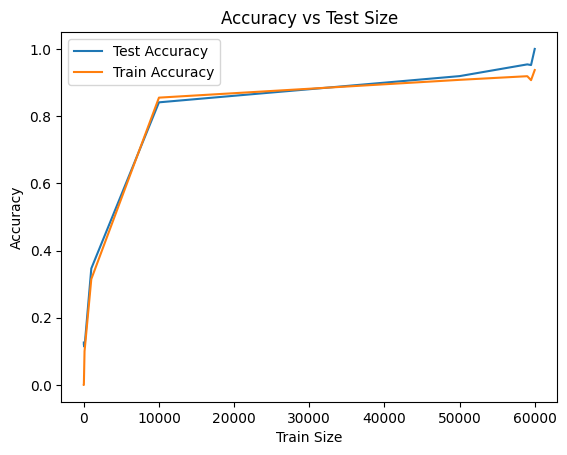

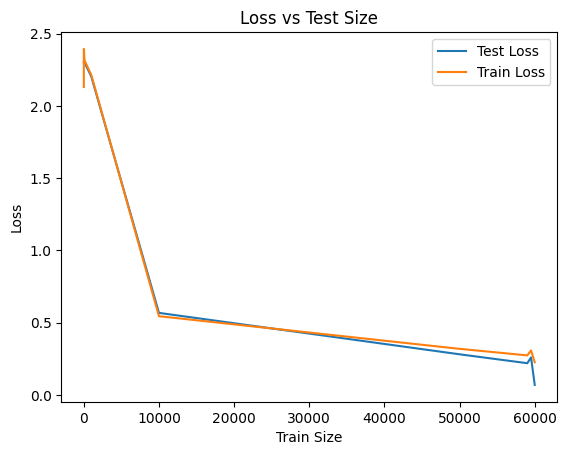

In [8]:
#Plot the loss versus the test size
plt.plot(train_size, test_acc)
plt.plot(train_size, train_acc)
plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.show()

#Plot the loss versus the test size
plt.plot(train_size, test_loss)
plt.plot(train_size, train_loss)
plt.xlabel('Train Size')
plt.ylabel('Loss')
plt.title('Loss vs Test Size')
plt.legend(['Test Loss', 'Train Loss'])
plt.show()

Here it can be seen that a training size of 10.000 of the pictures in the MNIST dataset is need to give a quite high accuracy and low loss. Increasing seems to just further increase the accuracy.

#### Adding more hidden layers to the model

Next we add several more hidden layers: Another Conv2D + AveragePooling2D and to more classification layers, Dense, with more parameters than for the simple model. This model is the same as shown in the slides example for week 7, exept for the input layer.

In [9]:
def make_advanced_model():
    Advanced_model = keras.Sequential()
    Advanced_model.add(layers.Conv2D(filters = 6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    Advanced_model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    Advanced_model.add(layers.Conv2D(filters = 16, kernel_size=(3, 3), activation='relu'))
    Advanced_model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    Advanced_model.add(layers.Flatten())
    Advanced_model.add(layers.Dense(units = 120, activation='relu'))
    Advanced_model.add(layers.Dense(units = 84, activation='relu'))
    Advanced_model.add(layers.Dense(units = 10, activation='softmax'))
    return Advanced_model

advanced_model = make_advanced_model()
advanced_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_10            │ (None, 13, 13, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,074 (234.66 KB)

 Trainable params: 60,074 (234.66 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
test_loss = []
test_acc = []
train_loss = []
train_acc = []

for i in train_size:
    print("Running with trainsize - testsize:", i, " - ", X.shape[0]-i)
    #Split data into training and testing sets
    X_train = X[:i]
    X_test = X[i:]
    y_train = y[:i]
    y_test = y[i:]
    #Create model
    advanced_model = make_advanced_model()
    #Compile
    advanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #Train
    history = advanced_model.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.2)
    #Sace the loss and accuracy from the training and testing sets
    train_loss.append(history.history['val_loss'][-1]) #Save last loss from training set
    train_acc.append(history.history['val_accuracy'][-1]) #Save last accuracy from training set
    loss_from_test, acc_from_test = advanced_model.evaluate(X_test, y_test)
    test_loss.append(loss_from_test)
    test_acc.append(acc_from_test)

Running with trainsize - testsize: 5  -  59995
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 2.2797 - val_accuracy: 0.0000e+00 - val_loss: 2.3019
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1187 - loss: 2.2961
Running with trainsize - testsize: 10  -  59990
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 2.2979 - val_accuracy: 0.0000e+00 - val_loss: 2.2668
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1565 - loss: 2.2884
Running with trainsize - testsize: 100  -  59900
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.1688 - loss: 2.2936 - val_accuracy: 0.1000 - val_loss: 2.2529
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1363 - loss: 2.2839
Running with trainsize - testsize: 1000  -  59000
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1819 - loss: 2.2791 - val_accuracy: 0.4350 - val_loss: 2.1310
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4432 - loss: 2.1373
Running with trainsize - testsi

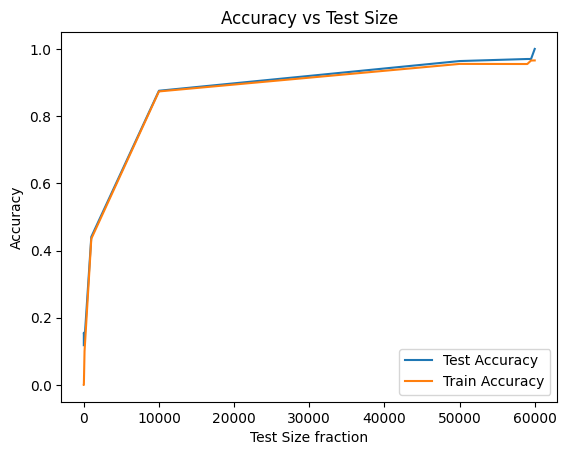

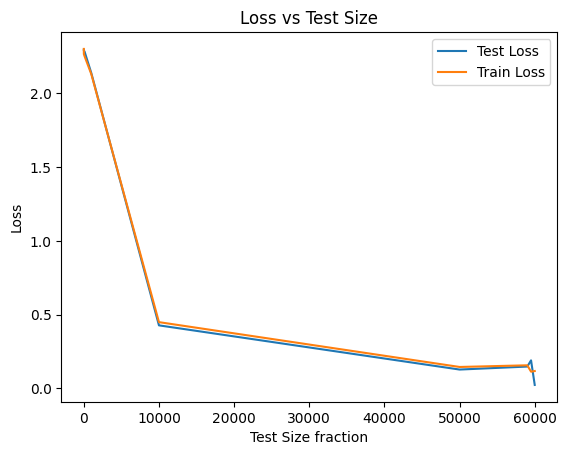

In [11]:
#Plot the accuracy versus the test size
plt.plot(train_size, test_acc)
plt.plot(train_size, train_acc)
plt.xlabel('Test Size fraction')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.show()

#Plot the loss versus the test size
plt.plot(train_size, test_loss)
plt.plot(train_size, train_loss)
plt.xlabel('Test Size fraction')
plt.ylabel('Loss')
plt.title('Loss vs Test Size')
plt.legend(['Test Loss', 'Train Loss'])
plt.show()

#### Epochs

We see that in both models, our accuracy rises the more data we use in our training set. It would be interesting to see how the model reacted to even more training data. The final training set size of 59990, however, only leaves 10 samples for testing - we can't trust the accuracy of the test on such a small sample size. Our best trustworthy result so far, then, is the advanced model, using a training /test split of 59000 / 1000.

We now try to run this specific setup, but with a varying number of epocs:

In [12]:
test_loss = []
test_acc = []
train_loss = []
train_acc = []

chosen_traing_set_size = 59500
number_of_epochs = [1, 2, 3, 4, 5, 10, 15, 20, 25]

for i in number_of_epochs:
    print("Running with epocs:", i)
    #Split data into training and testing sets
    X_train = X[:chosen_traing_set_size]
    X_test = X[chosen_traing_set_size:]
    y_train = y[:chosen_traing_set_size]
    y_test = y[chosen_traing_set_size:]
    #Create model
    advanced_model = make_advanced_model()
    #Compile
    advanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #Train
    history = advanced_model.fit(X_train, y_train, epochs=i, batch_size=64, validation_split=0.2)
    #Sace the loss and accuracy from the training and testing sets
    train_loss.append(history.history['val_loss'][-1]) #Save last loss from training set
    train_acc.append(history.history['val_accuracy'][-1]) #Save last accuracy from training set
    loss_from_test, acc_from_test = advanced_model.evaluate(X_test, y_test)
    test_loss.append(loss_from_test)
    test_acc.append(acc_from_test)

Running with epocs: 1
744/744 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7862 - loss: 0.7228 - val_accuracy: 0.9603 - val_loss: 0.1271
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9765 - loss: 0.1437
Running with epocs: 2
Epoch 1/2
744/744 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7790 - loss: 0.7430 - val_accuracy: 0.9598 - val_loss: 0.1319
Epoch 2/2
744/744 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9629 - loss: 0.1216 - val_accuracy: 0.9623 - val_loss: 0.1127
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.1299 
Running with epocs: 3
Epoch 1/3
744/744 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8132 - loss: 0.6470 - val_accuracy: 0.9634 - val_loss: 0.1251
Epoch 2/3
744/744 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9661 - loss: 0.1086 - val_accuracy: 0.9718 - val_loss: 0.0847
Epoch 3/3
744/744 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9781 - loss: 0.0719 - val_accuracy: 0.9805 - val_loss: 0.0629
16/16 ━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

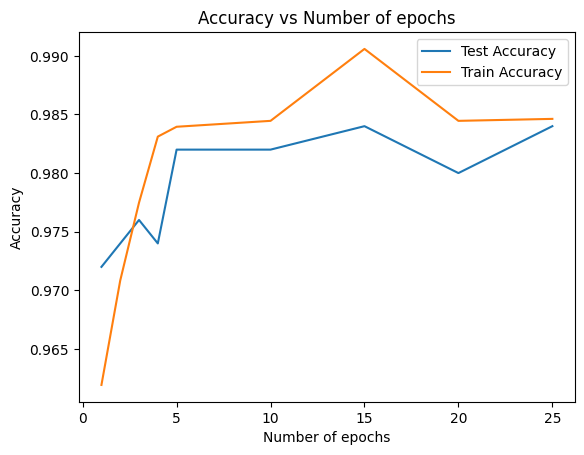

In [ ]:
#Plot the accuracy versus the number of epochs
plt.plot(number_of_epochs, test_acc)
plt.plot(number_of_epochs, train_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of epochs')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.show()

#### Conclusion
Fifteen epochs seems to give the best test accuracy, of 0.9906

Our best result, then, comes from the following setup:

In [ ]:
test_loss = []
test_acc = []
train_loss = []
train_acc = []

chosen_traing_set_size = 59500
chosen_number_of_epochs = 15

#Split data into training and testing sets
X_train = X[:chosen_traing_set_size]
X_test = X[chosen_traing_set_size:]
y_train = y[:chosen_traing_set_size]
y_test = y[chosen_traing_set_size:]
#Create model
advanced_model = make_advanced_model()
#Compile
advanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Train
history = advanced_model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
#Sace the loss and accuracy from the training and testing sets
train_loss.append(history.history['val_loss'][-1]) #Save last loss from training set
train_acc.append(history.history['val_accuracy'][-1]) #Save last accuracy from training set
loss_from_test, acc_from_test = advanced_model.evaluate(X_test, y_test)
test_loss.append(loss_from_test)
test_acc.append(acc_from_test)

/home/lundse/2a - Softwaretek/SWMAL - Machine Learning/swmal-opgaver/my-venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8120 - loss: 0.6831 - val_accuracy: 0.9666 - val_loss: 0.1097
Epoch 2/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9666 - loss: 0.1097 - val_accuracy: 0.9774 - val_loss: 0.0733
Epoch 3/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9762 - loss: 0.0737 - val_accuracy: 0.9773 - val_loss: 0.0775
Epoch 4/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9833 - loss: 0.0558 - val_accuracy: 0.9831 - val_loss: 0.0558
Epoch 5/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9862 - loss: 0.0450 - val_accuracy: 0.9845 - val_loss: 0.0508
Epoch 6/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9876 - loss: 0.0372 - val_accuracy: 0.9834 - val_loss: 0.0514
Epoch 7/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9894 - loss: 0.0340 - val_accuracy: 0.9855 - val_loss: 0.0441
Epoch 8/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy

## learning_curves.ipynb

### Qa Learning Curves

in this part we will be explaining the important parts,

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.


from the picture below

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">

Training Error: This is represented by the blue dashed line. It indicates the error of the model on the training data. As capacity increases, training error generally decreases since the model can fit the training data more accurately.

Generalization Error: This is represented by the solid green line. It shows the model's error on new test data. Initially, as capacity increases, generalization error decreases, but after reaching an optimal capacity, it starts to increase, indicating overfitting.

Underfitting Zone: This zone is on the left side of the optimal capacity. In this area, both training and generalization errors are high, as the model does not have enough capacity to capture the underlying pattern in the data.

Overfitting Zone: This is on the right side of the optimal capacity. In this zone, while training errors are low, generalization error increases because the model starts to fit noise in the training data, resulting in oftenly worse performance on new data.

Optimal Capacity: This is the point where the model achieves the best balance between training and generalization errors. Here the model has enough capacity to capture the data pattern without overfitting or underfitting.

Generalization Gap: The difference between training error and generalization error is labeled as the "generalization gap." As capacity increases, this gap widens, indicating that the model is not generalizing well to unseen data after going into the Overfitting zone.

X-Axis: Represents the model's capacity, which could be increased by adding more features, neurons, or complexity to the model. As capacity grows, the model becomes more flexible and can learn more complex patterns.
Y-Axis: Represents the error or loss, which could be measured using a metric like Mean Squared Error, Classification Error, etc. The lower the value, the better the model’s performance.

### Qb Learning Curves
We hace to produce a loss vs epoch graph.

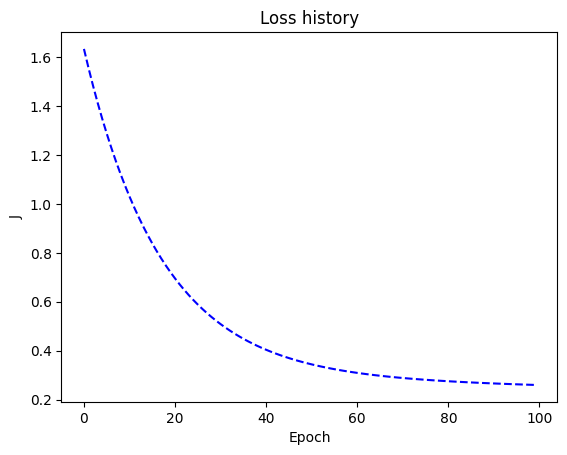

OK


In [ ]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np
class MyLinReg():
    def __init__(self, eta0=0.01, max_iter=10, tol=1e-3, n_iter_no_change=5, verbose=True):
        self.eta0 = eta0
        self.max_iter = max_iter
        self.tol = tol
        self.coef_with_intercept_ = None
        self.coef_ = None
        self.intercept_ = None
        self.n_features_in_ = None
        self.loss_history = []  # Here we initialize the loss history

    def __str__(self):
        return self.coef_
    
    def lossFunction(self, X, y, theta):
        #Calculates the gradient based on MSE
        return 2/len(X)*X.T@(X@theta-y)
    
    def compute_loss(self, X, y, theta):
        errors = X @ theta - y
        J = (errors ** 2).mean()  # Mean Squared Error
        return J
    
    def Weights(self):
        return self.coef_

    #Fit numerically
    def fit_CF(self, X, y):
        X_b = add_dummy_feature(X)
        #Calculate the Normal Equation
        self.coef_with_intercept_ = np.linalg.inv(X_b.T@X_b)@X_b.T@y
        self.intercept_ = self.coef_with_intercept_[0]
        self.coef_ = self.coef_with_intercept_[1:]

        return self.coef_with_intercept_
    
    #Fit with batch gradient descent
    def fit_GD(self, X, y):
        X_b = add_dummy_feature(X)
        #Start with random parameters
        X_dim = np.shape(X_b)
        theta = np.random.randn(X_dim[1],1)
        for epoch in range(self.max_iter):
            #Calculate loss (from gradient)
            loss = self.lossFunction(X_b, y, theta)
            theta = theta - self.eta0*loss
            J = self.compute_loss(X_b, y, theta)
            self.loss_history.append(J) 
            #Break if loss is below tolerance
            if (np.linalg.norm(loss) < self.tol).all():
                break

        self.coef_with_intercept_ = theta
        self.intercept_ = self.coef_with_intercept_[0]
        self.coef_ = self.coef_with_intercept_[1:]
        return self.coef_with_intercept_

    #Fit stochastic gradient descent
    def fit_SGD(self, X, y):
        X_b = add_dummy_feature(X)
        m = len(X_b)
        #Start with random parameters
        X_dim = np.shape(X_b)
        theta = np.random.randn(X_dim[1],1)
        self.loss_history = []  # Resetting for a new fit

        for epoch in range(self.max_iter):
            for iteration in range(m):
                #Pick random index
                random_index = np.random.randint(m)
                #Pick x_i sample row [w_0, w_1]
                x_i = X_b[random_index: random_index+1]
                #Get y_i of sample
                y_i = y[random_index: random_index+1]
                #Calculate partial derivative of sample
                gradient = self.lossFunction(x_i, y_i, theta)
                theta = theta - self.eta0*gradient
                J = self.compute_loss(X_b, y, theta)
                self.loss_history.append(J)  # Store loss
                #Break if gradient is below tolerance
                if (np.linalg.norm(gradient) < self.tol).all():
                    break
                
        self.coef_with_intercept_ = theta
        self.intercept_ = self.coef_with_intercept_[0]
        self.coef_ = self.coef_with_intercept_[1:]
        return self.coef_with_intercept_
    def LossHistory(self):
        return self.loss_history

    def predict(self, X: np.ndarray):
        X_b = add_dummy_feature(X)
        y_pred = X_b@self.coef_with_intercept_
        return y_pred.flatten()

    def score(self, X, y_true):
        X_b = add_dummy_feature(X)
        y_pred = X_b@self.coef_with_intercept_
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        return r2_score

# Example data for testing
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = np.random.rand(100, 1)  # 100 target values

# Initialize and train the model
r = MyLinReg(eta0=0.01, max_iter=100)
r.fit_GD(X, y)  # Call fit_GD or fit_SGD here to perform training



h = r.LossHistory()

# Plot of J vs. epoch (or perhaps iteration)...

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(h, 'b--')
ax.set_title("Loss history")
ax.set_xlabel("Epoch")
ax.set_ylabel("J")


zoom_axis = False
if zoom_axis:
    limits_x = ax.get_xlim()
    limits_y = ax.get_ylim()
    ax.set_ylim([0, limits_y[1]/10]) # zoom on y axis
    
plt.show()

print("OK")

As we can see, we get a nice loss v epoch graph. For the code it is obviously copied directly from our previous Opgavesæt 2, with a few noteworthy changes in the lines of "J = ..." and "Self.Loss_history ....", where we append the losses to accumulate them.

### Qc)  Early Stopping

We have to implement ___early stopping___, in our `MyLinReg` estimator.

Epoch 0, Training Loss: 0.21419567267459777, Validation Loss: 0.22595178069182417
Epoch 100, Training Loss: 0.08035590890147751, Validation Loss: 0.08039879575183535
Epoch 200, Training Loss: 0.08004123972197795, Validation Loss: 0.0795830926020463
Epoch 300, Training Loss: 0.08003503259212032, Validation Loss: 0.07949698700811456
Epoch 400, Training Loss: 0.08003070136449984, Validation Loss: 0.07943944355626768
Epoch 500, Training Loss: 0.08002729174875632, Validation Loss: 0.07939005915310658
Epoch 600, Training Loss: 0.08002460573262112, Validation Loss: 0.07934698697543972
Epoch 700, Training Loss: 0.08002248906632944, Validation Loss: 0.07930936200159518
Epoch 800, Training Loss: 0.08002082055172222, Validation Loss: 0.07927647241704108
Epoch 900, Training Loss: 0.08001950491679284, Validation Loss: 0.07924770462453642


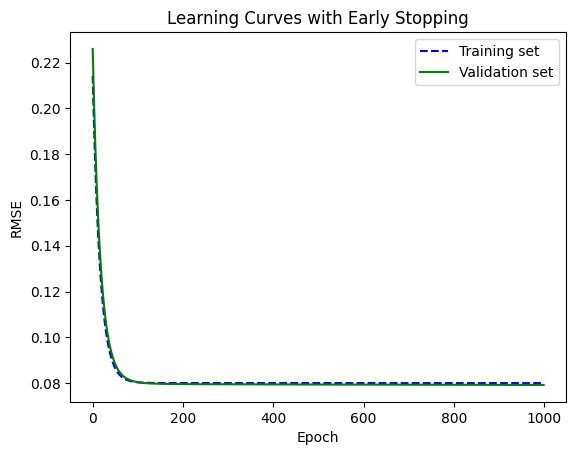

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import add_dummy_feature
import matplotlib.pyplot as plt

class MyLinReg:
    def __init__(self, eta0=0.01, max_iter=1000, tol=1e-3, n_iter_no_change=5, verbose=True):
        self.eta0 = eta0
        self.max_iter = max_iter
        self.tol = tol
        self.n_iter_no_change = n_iter_no_change
        self.verbose = verbose
        self.coef_with_intercept_ = None
        self.coef_ = None
        self.intercept_ = None
        self.loss_history_train = []
        self.loss_history_val = []
    
    def lossFunction(self, X, y, theta):
        return 2 / len(X) * X.T @ (X @ theta - y)
    
    def compute_loss(self, X, y, theta):
        errors = X @ theta - y
        return (errors ** 2).mean()  # Mean Squared Error
    
    def fit_GD(self, X, y, early_stopping=True):
        # Split into training and validation sets for early stopping
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_b = add_dummy_feature(X_train)
        X_val_b = add_dummy_feature(X_val)
        
        theta = np.random.randn(X_train_b.shape[1], 1)
        best_theta = theta
        best_val_loss = float('inf')
        epochs_no_improve = 0
        
        for epoch in range(self.max_iter):
            # Batch gradient descent step
            gradients = self.lossFunction(X_train_b, y_train, theta)
            theta -= self.eta0 * gradients
            
            # Compute training and validation loss
            train_loss = self.compute_loss(X_train_b, y_train, theta)
            val_loss = self.compute_loss(X_val_b, y_val, theta)
            
            # Store loss history for plotting
            self.loss_history_train.append(train_loss)
            self.loss_history_val.append(val_loss)
            
            # Check for early stopping condition
            if early_stopping:
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_theta = theta
                    epochs_no_improve = 0
                else:
                    epochs_no_improve += 1
                    if epochs_no_improve >= self.n_iter_no_change:
                        if self.verbose:
                            print(f"Early stopping on epoch {epoch}")
                        break
            
            if self.verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}")
        
        # Use best weights found
        self.coef_with_intercept_ = best_theta
        self.intercept_ = self.coef_with_intercept_[0]
        self.coef_ = self.coef_with_intercept_[1:]
    
    def LossHistory(self):
        return self.loss_history_train, self.loss_history_val

# Example usage with synthetic data
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = np.random.rand(100, 1)  # 100 target values

# Initialize and train the model with early stopping
model = MyLinReg(eta0=0.01, max_iter=1000, tol=1e-3, n_iter_no_change=5, verbose=True)
model.fit_GD(X, y)

# Retrieve and plot the loss history
train_loss, val_loss = model.LossHistory()

plt.plot(train_loss, 'b--', label='Training set')
plt.plot(val_loss, 'g-', label='Validation set')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.title("Learning Curves with Early Stopping")
plt.show()


So as we can see, we managed to make a nice early stopping graph, it looks pretty identical to the example given in the exercise description, so we must assume that we did it right.

## gridsearch.ipynb

### Selfmade Progress bar GridSearchCV 

In the following exercises, the lack of a progressbar was severely annoying, so ChatGPT was utilized to help make a gridsearch functioning parameteredsearch, that would spit out its progress at a customizable interval. As it stands it spits it out at 1/100th of the total amount of combinations and updates it from the previous one, but this can in the code be optimized to be every combination, so that you can truly see whether your search is progressing at all or not. However, when trying to implement parallization of cpu usage, it seems to be messing up the functionality, somehow buffering the output it was supposed to write only outputting it at the end.

As such the SearchQuest has been made with the normal GridSearchCV, where a verbose level of 50+ has been choosen as it should print out progress along the way. Even though this is essentially what our own function does as well, the verbose logging doesnt clear old log statements or prevents it from logging warnings like convergence errors, so that is still better handled in our own implementation. But even the verbose level of 50+ doesnt work either, so we use out PGSearch on the mnist data to see how long a single or couple of combinations take. We then know that the time that lets say 10 takes out of 1000 would be 1/100th the time (divided by our available cpu count, while running it in parallization with njobs in the gridsearch) to run a full search, with small differences in time depending on the hyperparameter, where only really the max_iter parameter seems to be a lot more time consuming than most others, looking to be a 2x in max iter equals a roughly 2x in extra time.

All in all our code just needs a successfull way of running the code of ProgressGridSearch with some form of a library utilizing full cpu or gpu power, without breaking the intention of the program. But for now we couldnt find any that did this without ruining the code. But it might be more successfull to run the code on the cluster, as it might not have trouble and already utilizes all of one GPU without needing to further parallize anything, leading to a way better result than a single core on one laptop CPU.


### Qa Explain GridSearchCV

We have to expain a bit about the functionality of the code below, particularily the `GridSearchCV` and how it works, alongside the `FullReport` function and the parameters `scoring='f1_micro'` and `n_jobs=-1`. 

In [14]:
# TODO: Qa, code review..cell 1) function setup

from time import time
import numpy as np
import sys

from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn import datasets

from libitmal import dataloaders as itmaldataloaders # Needed for load of iris, moon and mnist

currmode="N/A" # GLOBAL var!

def SearchReport(model): 
    
    def GetBestModelCTOR(model, best_params):
        def GetParams(best_params):
            ret_str=""          
            for key in sorted(best_params):
                value = best_params[key]
                temp_str = "'" if str(type(value))=="<class 'str'>" else ""
                if len(ret_str)>0:
                    ret_str += ','
                ret_str += f'{key}={temp_str}{value}{temp_str}'  
            return ret_str          
        try:
            param_str = GetParams(best_params)
            return type(model).__name__ + '(' + param_str + ')' 
        except:
            return "N/A(1)"
        
    print("\nBest model set found on train set:")
    print()
    print(f"\tbest parameters={model.best_params_}")
    print(f"\tbest '{model.scoring}' score={model.best_score_}")
    print(f"\tbest index={model.best_index_}")
    print()
    print(f"Best estimator CTOR:")
    print(f"\t{model.best_estimator_}")
    print()
    try:
        print(f"Grid scores ('{model.scoring}') on development set:")
        means = model.cv_results_['mean_test_score']
        stds  = model.cv_results_['std_test_score']
        i=0
        for mean, std, params in zip(means, stds, model.cv_results_['params']):
            print("\t[%2d]: %0.3f (+/-%0.03f) for %r" % (i, mean, std * 2, params))
            i += 1
    except:
        print("WARNING: the random search do not provide means/stds")
    
    global currmode                
    assert "f1_micro"==str(model.scoring), f"come on, we need to fix the scoring to be able to compare model-fits! Your scoreing={str(model.scoring)}...remember to add scoring='f1_micro' to the search"   
    return f"best: dat={currmode}, score={model.best_score_:0.5f}, model={GetBestModelCTOR(model.estimator,model.best_params_)}", model.best_estimator_ 

def ClassificationReport(model, X_test, y_test, target_names=None):
    assert X_test.shape[0]==y_test.shape[0]
    print("\nDetailed classification report:")
    print("\tThe model is trained on the full development set.")
    print("\tThe scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)                 
    print(classification_report(y_true, y_pred, target_names=target_names))
    print()
    
def FullReport(model, X_test, y_test, t):
    print(f"SEARCH TIME: {t:0.2f} sec")
    beststr, bestmodel = SearchReport(model)
    ClassificationReport(model, X_test, y_test)    
    print(f"CTOR for best model: {bestmodel}\n")
    print(f"{beststr}\n")
    return beststr, bestmodel
    
def LoadAndSetupData(mode, test_size=0.3):
    assert test_size>=0.0 and test_size<=1.0
    
    def ShapeToString(Z):
        n = Z.ndim
        s = "("
        for i in range(n):
            s += f"{Z.shape[i]:5d}"
            if i+1!=n:
                s += ";"
        return s+")"

    global currmode
    currmode=mode
    print(f"DATA: {currmode}..")
    
    if mode=='moon':
        X, y = itmaldataloaders.MOON_GetDataSet(n_samples=5000, noise=0.2)
        itmaldataloaders.MOON_Plot(X, y)
    elif mode=='mnist':
        X, y = itmaldataloaders.MNIST_GetDataSet(load_mode=0)
        if X.ndim==3:
            X=np.reshape(X, (X.shape[0], -1))
    elif mode=='iris':
        X, y = itmaldataloaders.IRIS_GetDataSet()
    else:
        raise ValueError(f"could not load data for that particular mode='{mode}', only 'moon'/'mnist'/'iris' supported")
        
    print(f'  org. data:  X.shape      ={ShapeToString(X)}, y.shape      ={ShapeToString(y)}')

    assert X.ndim==2
    assert X.shape[0]==y.shape[0]
    assert y.ndim==1 or (y.ndim==2 and y.shape[1]==0)    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0, shuffle=True
    )
    
    print(f'  train data: X_train.shape={ShapeToString(X_train)}, y_train.shape={ShapeToString(y_train)}')
    print(f'  test data:  X_test.shape ={ShapeToString(X_test)}, y_test.shape ={ShapeToString(y_test)}')
    print()
    
    return X_train, X_test, y_train, y_test

def TryKerasImport(verbose=True):
    
    kerasok = True
    try:
        import keras as keras_try
    except:
        kerasok = False

    tensorflowkerasok = True
    try:
        import tensorflow.keras as tensorflowkeras_try
    except:
        tensorflowkerasok = False
        
    ok = kerasok or tensorflowkerasok
    
    if not ok and verbose:
        if not kerasok:
            print("WARNING: importing 'keras' failed", file=sys.stderr)
        if not tensorflowkerasok:
            print("WARNING: importing 'tensorflow.keras' failed", file=sys.stderr)

    return ok
    
print(f"OK(function setup" + ("" if TryKerasImport() else ", hope MNIST loads works because it seems you miss the installation of Keras or Tensorflow!") + ")")

# TODO: Qa, code review..cell 2) the actual grid-search

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = svm.SVC(
    gamma=0.001
)  # NOTE: gamma="scale" does not work in older Scikit-learn frameworks,
# FIX:  replace with model = svm.SVC(gamma=0.001)

tuning_parameters = {
    'kernel': ('linear', 'rbf'), 
    'C': [0.1, 1, 10]
}

CV = 5
VERBOSE = 53

# Run GridSearchCV for the model
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=53,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

ModuleNotFoundError: No module named 'libitmal'


GridSearchCV is set up with the SVM model and tuning_parameters, specifying 5-fold cross-validation (cv=5), that splits the data into 5 equal 20% segments and trains the data on 4 folds, while testing it on the last fold, equalling 5 tests in total and averages the result. (1). 

It also uses f1_micro scoring, which "Calculates metrics globally by counting the total true positives, false negatives and false positives" (2), and specifies running on all CPU cores (n_jobs=-1). 

The tuning_parameters is defined as a dictionary with each key being a hperparameer and with an associated list of values to test, which creates a grid of every possible combination of these hyperparameters, which is why we call it a gridsearch.

grid_tuned.fit(X_train, y_train) begins the grid search, training the model for each parameter combination.

FullReport, gives us the best model it found, the time it took the search took and the best models specific performance and parameters, while also listing the remaining ones afterwards.

(1) https://scikit-learn.org/stable/modules/cross_validation.html

(2) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

### Qb Hyperparameter Grid Search using an SDG classifier

We have to repeat the gridsearch but replacing the svm.SVC model with an SGDClassifier instead. We choose a suitable set of hyperparameters and in the code it explains a little more about the intervals of the choosen values. 


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
from ProgressGridSearch import PGSearch
import sys

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData('iris')

# Model
model = SGDClassifier()

# Define the hyperparameter search space for SGDClassifier
tuning_parameters = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],  # Choose all options except the ones that was specified to be meant for regression
    'penalty': [None, 'l2', 'l1', 'elasticnet'],  # Choose all available penalty types
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Regularization strength choosen from default 0.0001 to 10
    'l1_ratio': [0.15, 0.25, 0.5, 0.75, 0.85, 1],  # The Elastic Net mixing parameter, with 0.15 as default and 1 as maximum
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model, default is True
    'max_iter': [1000, 10000, 100000],  # Maximum number of iterations, default is 1.000 and we went up to 100.000
    'tol': [1e-3, 1e-4, 1e-5, 1e-6],  # Tolerance for stopping criteria, default is 1e-3 and we went down to 1e-6
}

# Perform the manual grid search with progress updates
best_score, best_params = PGSearch(model, tuning_parameters, X_train, y_train, X_test, y_test, progress_interval=100)

# Re-enable warnings if needed
warnings.resetwarnings()


DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

Total combinations to try: 17280
Progress: 17280/17280 - Elapsed time: 233.41s
Search completed.
Best Score: 0.9777777777777777
Best Params: {'alpha': 0.0001, 'fit_intercept': True, 'l1_ratio': 0.25, 'loss': 'perceptron', 'max_iter': 10000, 'penalty': None, 'tol': 0.0001}
Total Search Time: 233.41s


We choose a decently sized amount of hyperparameters as the dataset IRIS is fairly easy to run, still took 233 seconds, but overall nothing major. Came out with a pretty good score and some sensible data.

### Qc Hyperparameter Random  Search using an SDG classifier

Now, we have to run `RandomizedSearchCV` instead, while explaining a bit about the n_iter parameter. Lastly we compare a bit of the scores from the previous and current search.


In [ ]:
import time  # Ensure time module is imported

# Run RandomizedSearchCV for the SGDClassifier model
random_tuned = RandomizedSearchCV(
    model, 
    tuning_parameters, 
    n_iter=20,  # Number of random samples to evaluate
    random_state=42, 
    cv=CV, 
    scoring='f1_micro', 
    verbose=VERBOSE, 
    n_jobs=-1
)

start = time.time()  # Use time.time() to get the current timestamp
random_tuned.fit(X_train, y_train)
t_random = time.time() - start

# Report result
print("\nRandomized Search Results:")
b0_random, m0_random = FullReport(random_tuned, X_test, y_test, t_random)
print('OK(random-search)')


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Randomized Search Results:
SEARCH TIME: 0.21 sec

Best model set found on train set:

	best parameters={'tol': 1e-05, 'penalty': None, 'max_iter': 10000, 'loss': 'squared_hinge', 'l1_ratio': 0.85, 'fit_intercept': False, 'alpha': 0.01}
	best 'f1_micro' score=0.980952380952381
	best index=11

Best estimator CTOR:
	SGDClassifier(alpha=0.01, fit_intercept=False, l1_ratio=0.85,
              loss='squared_hinge', max_iter=10000, penalty=None, tol=1e-05)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.476 (+/-0.276) for {'tol': 1e-06, 'penalty': None, 'max_iter': 1000, 'loss': 'perceptron', 'l1_ratio': 1, 'fit_intercept': True, 'alpha': 10}
	[ 1]: 0.905 (+/-0.159) for {'tol': 0.001, 'penalty': 'elasticnet', 'max_iter': 100000, 'loss': 'modified_huber', 'l1_ratio': 0.75, 'fit_intercept': True, 'alpha': 0.0001}
	[ 2]: 0.905 (+/-0.104) for {'tol': 1e-05, 'penalty': 'elasticnet', 'max_iter': 1000, 'loss': 'modified_huber', 'l


In RandomizedSearchCV, n_iter controls the number of random combinations of hyperparameters to evaluate. Unlike GridSearchCV, which evaluates every possible combination, RandomizedSearchCV only checks a specified number of combinations (defined by n_iter). This makes it much more efficient, especially when the parameter space is large, because it trades off thoroughness for speed. By adjusting n_iter, you balance the trade-off between computational cost and the likelihood of finding a good hyperparameter set.

Comparison of Results
After running both GridSearchCV and RandomizedSearchCV, we can see that the results score is rather similar, although there is a few differences in which parameters randomized found vs gridsearch, this is mostly cause we are working on the IRIS data, that is severely easier to search than the MNIST data, so it is hard to see, whether the randomized "fault" would appear as badly, since the result is really good and really fast. If we were to utilize the MNIST data instead, we should see that the overall faster search should be the randomizedsearch, while the overall better result should come from gridsearch, at the cost of longer time spend searching.

### Qd MNIST Search Quest II

We have to call the MNIST data and do a search of either previous kind on it to find the besst "result" and input our data on Brightspace. We choose a similar but slightly smaller amount of hyperparameters than was used previously as a basis.


In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time

# Load the MNIST data
X_train, X_test, y_train, y_test = LoadAndSetupData('mnist')

# Define a pipeline with scaling
pipeline = Pipeline([
    ('classifier', SGDClassifier())  # Placeholder for the classifier
])

param_grid = [
    {
        'classifier': [SGDClassifier()],
        'classifier__loss': ['hinge', 'squared_hinge'],
        'classifier__penalty': ['l1', 'l2', 'elasticnet'],
        'classifier__alpha': [0.0001, 0.001],  # Include lower alpha
        'classifier__eta0': [0.01, 0.1],  # Initial learning rate
        'classifier__learning_rate': ['invscaling', 'optimal'],  # Explore different learning rate schedules
        'classifier__max_iter': [1500, 2000, 2500],  # Test the range around 1500
        'classifier__tol': [0.0001, 1e-4]  # Lower tolerance for potentially better convergence
    }
]


# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_micro',
    cv=3,  # 3-fold cross-validation to balance speed and thoroughness
    verbose=51,
    n_jobs=-1  # Use all available CPU cores
)

# Run grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
search_duration = end_time - start_time


best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")

# Evaluate on test data
y_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_pred, average='micro')
print(f"Test F1 Score: {test_f1_score}")

# Pass grid_search (not best_model) to FullReport to access best_params_ and best_score_
b1, m1 = FullReport(grid_search, X_test, y_test, search_duration)
print(b1)


NameError: name 'LoadAndSetupData' is not defined

We managed to run a full run of a gridsearchCV with a smaller set of hyperparameters, score is written on brightspace as 

"GRP 1: Best Score: 0.8861429599197209 Best Params: {'classifier': SGDClassifier(), 'classifier__alpha': 0.01, 'classifier__l1_ratio': 0.15, 'classifier__loss': 'hinge', 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__tol': 0.0001}"

overall it took a couple of hours and the score was "Okay", def could be improved but we havent really tried the cluster to run code on, so we dont have the time to really try and improve the model, it would prob be smart to have attempted a bit of the RandomForestClassifier as well, but again due to time constraints we opted not to.